In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

data_loc="../logs/"

def load_file(fname):
    f=open(fname,'r')
    headings_t=[]
    headings=[]
    turns_t=[]
    turns=[]
    tracks_t=[]
    tracks=[]
    tracks_kalman=[]
    for line in f.readlines():
        dat=json.loads(line)
        timestamp=dat["timestamp"]
        if "compass_heading" in dat:
            headings_t.append(timestamp)
            headings.append(dat["compass_heading"])
        if "command" in dat:
            if dat["command"]["address"]==["drive","translate"]:
                turns_t.append(timestamp)
                turns.append(dat["command"]["value"][2])                
        if "tracked_objects" in dat:
            name="sports ball"
            for obj in dat["tracked_objects"]:                
                if obj["label"]==name:
                    tracks_t.append(timestamp)
                    tracks.append( obj["last_update"][0] )
                    tracks_kalman.append( obj["xywh"][0] )
                    

    f.close()
    offset=headings_t[0]
    headings=np.array(headings)
    headings_t=np.array(headings_t)-offset
    turns=np.array(turns)
    turns_t=np.array(turns_t)-offset
    tracks=np.array(tracks)
    tracks_kalman=np.array(tracks_kalman)

    tracks_t=np.array(tracks_t)-offset
    return headings_t,headings,turns_t,turns,tracks_t,tracks,tracks_kalman

#print(turns_t)

<ipython-input-2-76e446a7869d>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-76e446a7869d>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-76e446a7869d>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-76e446a7869d>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-2-76e446a7869d>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


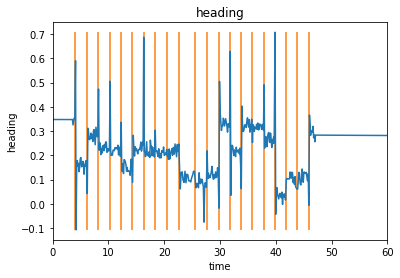

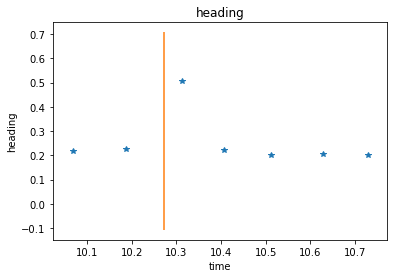

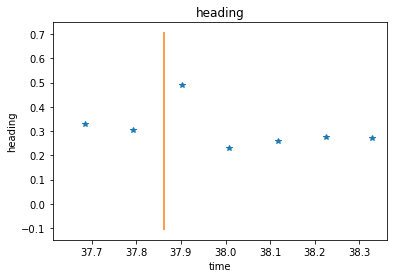

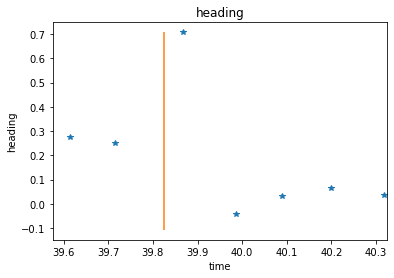

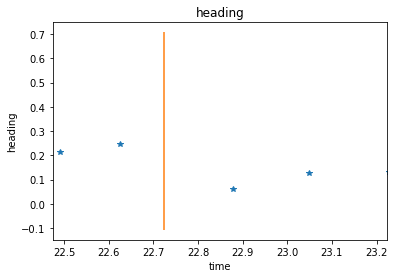

In [2]:
import random
#headings_t,headings,turns_t,turns,tracks_t,tracks=load_file(data_loc+"sensor_log_20210115-101349.txt")
headings_t,headings,turns_t,turns,tracks_t,tracks,tracks_kalman=load_file(data_loc+"sensor_log_20210117-230651.txt")



fig, ax = plt.subplots()
plt.xlim(0,60)
ax.set(xlabel='time', ylabel='heading',title='heading')
ax.plot(headings_t,headings)
ax.vlines(turns_t,np.min(headings),np.max(headings),color="C1")
fig.show()

for i in range(4):
    j=random.choice(range(len(turns_t)))
    fig, ax = plt.subplots()
    plt.xlim(turns_t[j]-0.25,turns_t[j]+0.5)
    ax.set(xlabel='time', ylabel='heading',title='heading')
    ax.plot(headings_t,headings,'*')
    ax.vlines(turns_t,np.min(headings),np.max(headings),color="C1")
    fig.show()

    

<ipython-input-4-3d863e4141d2>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-3d863e4141d2>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-3d863e4141d2>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-3d863e4141d2>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-3d863e4141d2>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


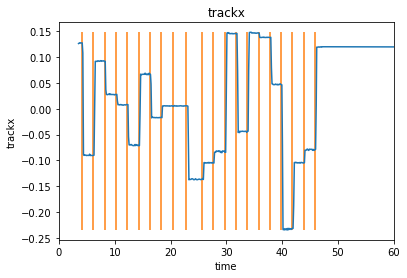

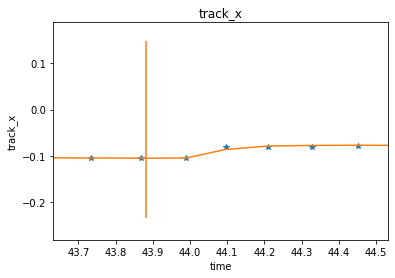

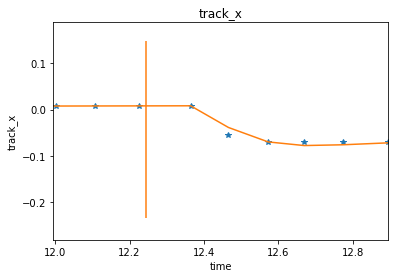

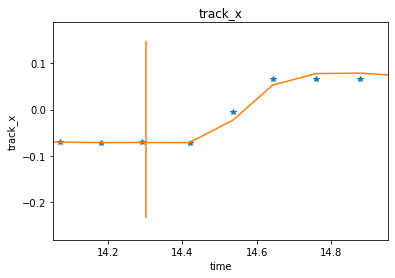

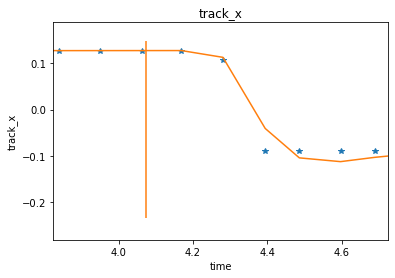

In [4]:
fig, ax = plt.subplots()
plt.xlim(0,60)
ax.set(xlabel='time', ylabel='trackx',title='trackx')
ax.plot(tracks_t,tracks)
ax.vlines(turns_t,np.min(tracks),np.max(tracks),color="C1")
fig.show()

for i in range(4):
    j=random.choice(range(len(turns_t)))
    fig, ax = plt.subplots()
    plt.xlim(turns_t[j]-0.25,turns_t[j]+0.65)
    ax.set(xlabel='time', ylabel='track_x',title='track_x')
    ax.plot(tracks_t,tracks,'*')
    ax.plot(tracks_t,tracks_kalman)

    ax.vlines(turns_t,np.min(tracks),np.max(tracks),color="C1")
    fig.show()